In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import f1_score

# سوال ۶

In [ ]:
def plot_random_data_distance(n,dim):
  datapoints = np.random.uniform(low=0, high=10, size=(n, dim))
  plt.hist(np.triu(cdist(datapoints,datapoints)).ravel())
  plt.show()

## الف )

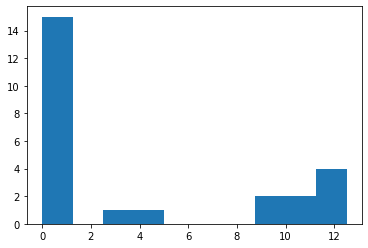

In [ ]:
plot_random_data_distance(5,5)

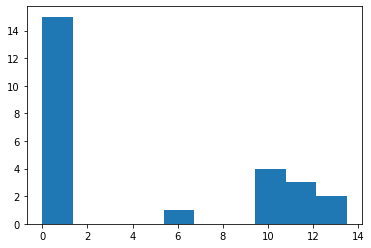

In [ ]:
plot_random_data_distance(5,10)

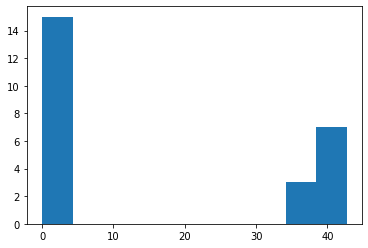

In [ ]:
plot_random_data_distance(5,100)

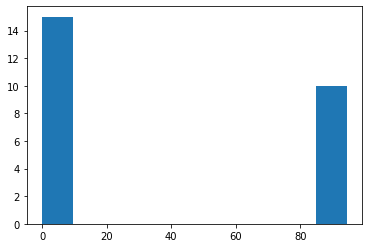

In [ ]:
plot_random_data_distance(5,500)

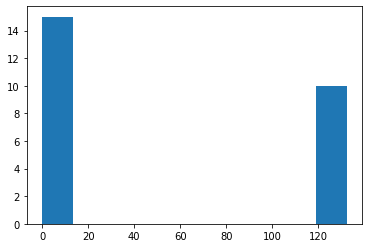

In [ ]:
plot_random_data_distance(5,1000)

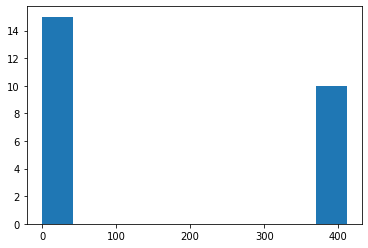

In [ ]:
plot_random_data_distance(5,10000)

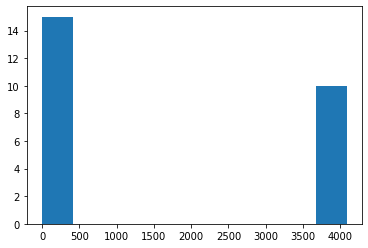

In [ ]:
plot_random_data_distance(5,1000000)

## ب )

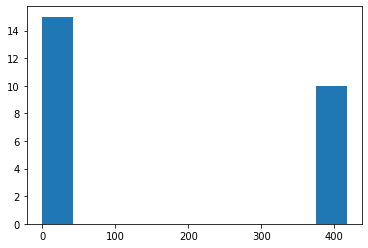

In [ ]:
plot_random_data_distance(5,10000)

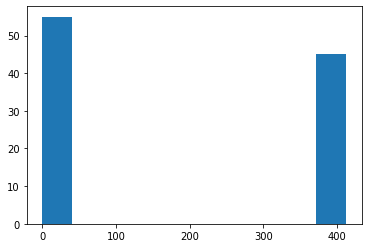

In [ ]:
plot_random_data_distance(10,10000)

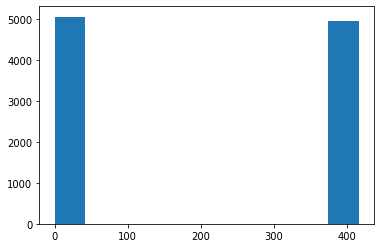

In [ ]:
plot_random_data_distance(100,10000)

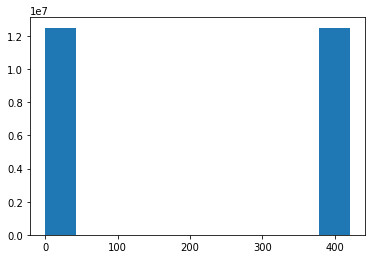

In [ ]:
plot_random_data_distance(5000,10000)

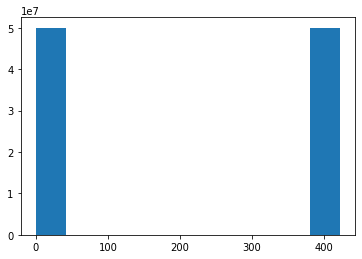

In [ ]:
plot_random_data_distance(10000,10000)

## ج )
<p dir=rtl> با افزایش بعد به طوری که تعداد داده ها ثابت و ۵ باشد به مرور فاصله هر دو داده به فاصله داده های دیگر نزدیک خواهد شد به این منظور که تقریبا تمام داده ها از هم ۱ فاصله یکسان خواهند داشت. این اتفاق کار را برای knn سخت خواهد کرد. به این اتفاق curse of dimensionality میگویند. برای حل این مشکل باید تعداد داده ها را بیشتر کرد. در بخش بعدی که ابعاد ثابت و ۱۰۰۰۰ بوده است و تعداده داده ها را افزایش داده‌ایم، در اینجا چون در تمامی حالات همچنان نسبت ابعاد به تعداد داده ها بیشتر است، همچنان این مشکل رخ میدهد. احتمالا با افزایش داده ها چند دسته از فاصله ها را شاهد باشیم و کار برای الگوریتم knn کمی راحت تر شود تا بتواند داده ها را از یکدیگر جدا کند.</p>

# سوال ۷

In [3]:
!unzip "/content/drive/MyDrive/DigitDB.zip"

Archive:  /content/drive/MyDrive/DigitDB.zip
   creating: DigitDB/
  inflating: __MACOSX/._DigitDB      
  inflating: DigitDB/Train 60000.cdb  
  inflating: __MACOSX/DigitDB/._Train 60000.cdb  
  inflating: DigitDB/Test 20000.cdb  
  inflating: __MACOSX/DigitDB/._Test 20000.cdb  
  inflating: DigitDB/RemainingSamples.cdb  
  inflating: __MACOSX/DigitDB/._RemainingSamples.cdb  


<p dir=rtl> در این سوال ابتدا با توابع hodaDatasetReader داده ها را خوانده‌ایم.هنگام خواندن طول و عرض تمام عکس ها را یکی و آن ها را ۳۲ در ۳۲ در نظر گرفته‌ایم. سپس ۳ داده از هر کلاس را نمایش داده‌ایم.</p>

In [66]:
import sys
import os 

py_file_location = "/content/drive/My Drive"
sys.path.append(os.path.abspath(py_file_location))

from HodaDatasetReader import read_hoda_dataset

print('Reading train dataset (Train 60000.cdb)...')
X_train, Y_train = read_hoda_dataset(dataset_path='./DigitDB/Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=False)

Reading train dataset (Train 60000.cdb)...


In [11]:
np.unique(Y_train)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

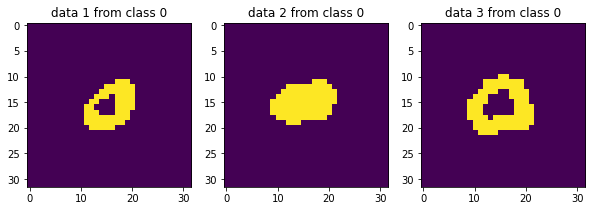

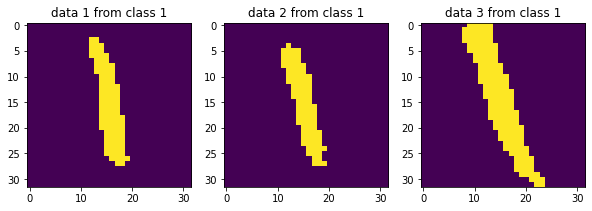

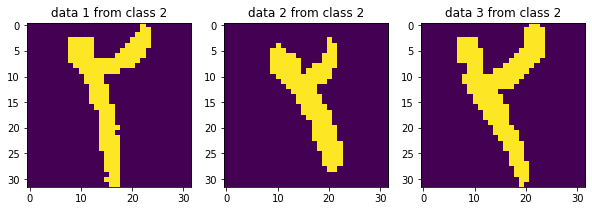

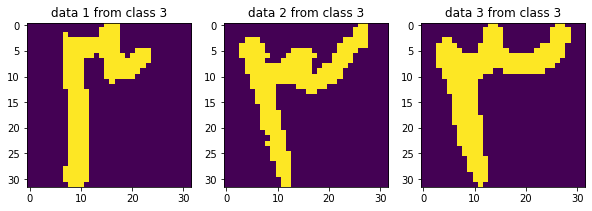

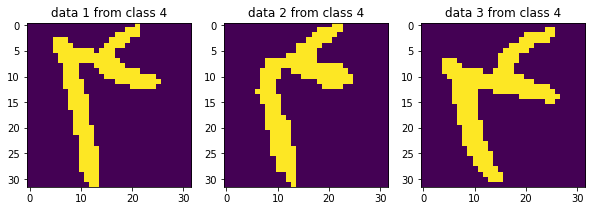

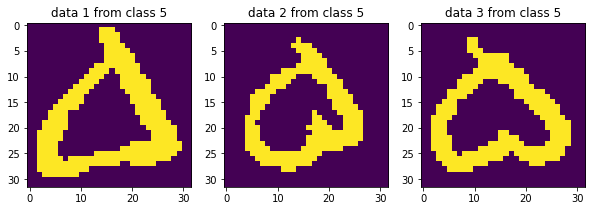

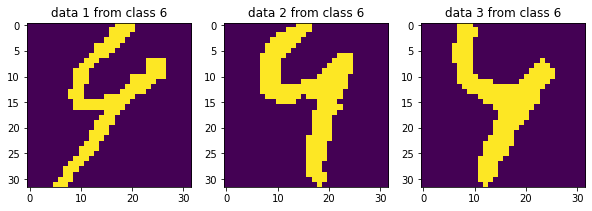

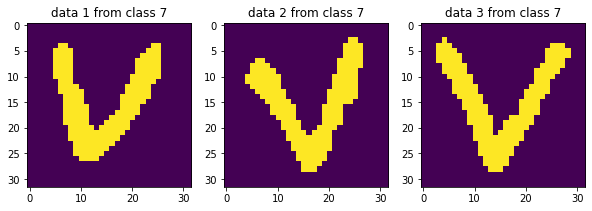

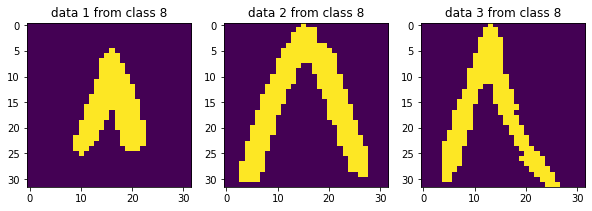

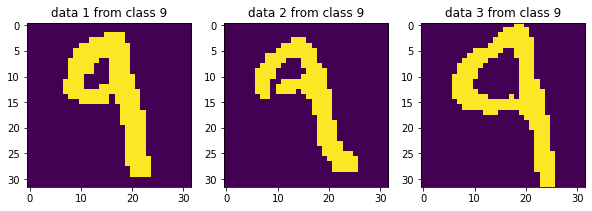

In [64]:
for cl in range(10):
  count = 0
  plt.figure(figsize=(10,10))

  for sample_ind in range(len(X_train)):
    if(Y_train[sample_ind] == cl and count < 3):
      plt.subplot(1,3,count+1)
      count += 1
      plt.imshow(X_train[sample_ind].reshape((32,32)))
      plt.title('data '+str(count) + ' from class ' + str(cl))
  plt.show()


<p dir=rtl> حال به پیاده‌سازی الگوریتم knn بدون کتابخانه های آماده میپردازیم. در اینجا سعی بر این بوده تا توابع مانند کتابخانه آماده باشد. بنابراین یم تابع fit خواهیم داشت که تنها داده داده ها را set میکند، سپس یک تابع به نام predict پیاده‌سازی کرده ایم. در این تابع ابتدا به دنبال همسایگان داده‌ی جدید میگردیم. برای این کار فاصله اقلیدوسی این داده را با تمام داده های train مان بدست آورده و سپس k تا نزدیک ترین این نقاط را به عنوان k همسایه داده جدید در نظر میگیریم. حال label این داده را درواقع بیشترین label در بین این k همسایه در نظر می‌گیریم.</p>

In [34]:
class KNN():
  def __init__(self, k):
    self.k = k

  def fit(self, X_train, Y_train):
    self.X_train = X_train
    self.Y_train = Y_train

  def get_euclidean_dist(self,x,y):
    return np.sqrt( np.sum( np.square( x - y ) ) )

  def find_neighbors(self, new_data):
    new_data_distances = []
    for x in self.X_train:
      new_data_distances.append(self.get_euclidean_dist(x,new_data))
    neighbors_labels_array = np.array(new_data_distances)
    indexes = neighbors_labels_array.argsort()
    Y_train_sorted = self.Y_train[indexes]
    return Y_train_sorted[:self.k]
  
  def predict(self, X_test):
    Y_predict = np.zeros( (X_test.shape)[0] )
    for ind in range(len(X_test)):
      neighbors_labels = self.find_neighbors(X_test[ind])
      Y_predict[ind] = max(set(neighbors_labels))
    return Y_predict

def draw_cm(y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred)
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title('Confusion matrix')
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)
  thresh = cm.max() / 10.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

<p dir=rtl>در این بخش ابتدا داده ها را کم کرده و ۶۰۰ داده برای test به صورت رندوم انتخاب میکنیم، سپس از هر کلاس ۴۰۰ داده برای train انتخاب کرده و داده ها را shuffle میکنیم. حال knn خود را با k = 10 روی این داده ها اجرا میکنیم. نتایج در ادامه آمده است. برای نتایج از confiusion matrix و f1 score استفاده شده است. در اینجا f1 score به این صورت عمل میکند که f1 score تمام کلاس ها را بدست آورده و در نهایت میانگین میگیرد.</p>


In [53]:
def split_data(X_train, Y_train):
  X = []
  y = []
  for cl in range(10):
    count = 0
    for sample_ind in range(len(X_train)):
      if(Y_train[sample_ind] == cl and count < 400):
        X.append(X_train[sample_ind])
        y.append(Y_train[sample_ind])
        count += 1
  
  return np.array(X), np.array(y)

In [77]:
from sklearn.utils import shuffle

idx = np.random.choice(np.arange(len(X_train)), 600, replace=False)
x_test = X_train[idx]
y_true = Y_train[idx]

X_train = np.delete(X_train, idx, axis = 0)
Y_train = np.delete(Y_train, idx)

X_data, y_data = split_data(X_train, Y_train)
X, y = shuffle(X_data, y_data, random_state=42)


knn = KNN(10)
knn.fit(X,y)
y_pred = knn.predict(x_test)

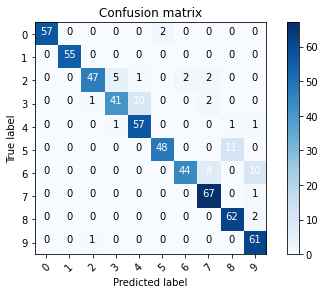

 F1 SCORE :  0.8968232320800731


In [84]:
draw_cm(y_true, y_pred, range(0,10))
f1 = f1_score(y_true, y_pred, average='macro')
print(" F1 SCORE : ", f1)

<p dir=rtl> حال همین کار را با دیتایی که نرمالایز شده است و تمام پیکسل های آن تقسیم بر ۲۵۵ شده اند انجام میدهیم. برای آنکه بهتر بتوانیم بررسی کنیم داده ها را همان داده هایی که برای مرحله قبل استفاده کردیم در نظر می‌گیریم. همانطور که مشخص است این کار خیلی تاثیری روی نتیجه نداشت زیرا در این تمرین range پیکسل ها که همان feature های ما بودند همه یکسان بود و نرمالیزیشن در این جا فایده ای نخواد داشت.</p>


In [85]:
def normalize_data(X):
  return X/255. 

normalized_X_train = normalize_data(X)
normalized_X_test = normalize_data(x_test)

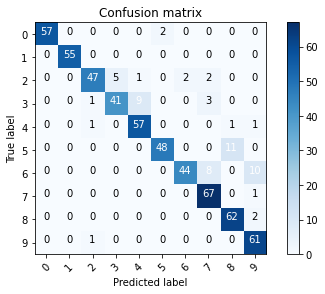

 F1 SCORE :  0.8968916927579583


In [86]:
knn2 = KNN(10)
knn2.fit(normalized_X_train,y)
y_pred = knn2.predict(normalized_X_test)
draw_cm(y_true, y_pred, range(0,10))
f1 = f1_score(y_true, y_pred, average='macro')
print(" F1 SCORE : ", f1)

<p dir=rtl> در این بخش از توابع آماده برای پیاده‌سازی knn استفاده میکنیم. در این بخش نیز از همان داده ها که در بخش اول انتخاب کرده بودیم استفاده میکنیم. همانطور که مشخص است با استفاده از این توابع کمی f1_score افزایش یافته که این میتواند به علت shape داده ها باشد. این کلاس داده ها رابه صورت ۳۲ در ۳۲ قبول نمیکرد بنابر این داده ها را reshape کرده و به صورت ۱۰۲۴ تایی در آوردیم. در این بخش نیز نتایج هنکامی که داده ها نرمالایز شده اند تفاوتی با حالت عادی نمیکند.</p>


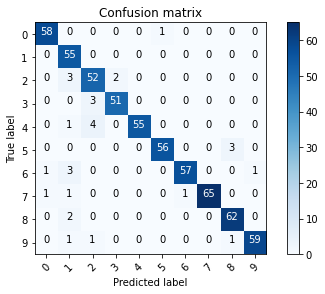

 F1 SCORE :  0.949658260011612


In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric

knn_model = KNeighborsClassifier(n_neighbors=10 ,metric = "euclidean")
X = X.reshape(-1,1024)
x_test = x_test.reshape(-1,1024)
knn_model.fit(X, y)
y_pred = knn_model.predict(x_test)
draw_cm(y_true, y_pred, range(0,10))
f1 = f1_score(y_true, y_pred, average='macro')
print(" F1 SCORE : ", f1)

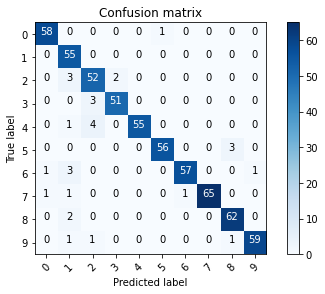

 F1 SCORE :  0.949658260011612


In [102]:
knn_model2 = KNeighborsClassifier(n_neighbors=10,metric = "euclidean")
normalized_X_train = normalized_X_train.reshape(-1,1024)
normalized_X_test = normalized_X_test.reshape(-1,1024)
knn_model2.fit(normalized_X_train, y)
y_pred = knn_model2.predict(normalized_X_test)
draw_cm(y_true, y_pred, range(0,10))
f1 = f1_score(y_true, y_pred, average='macro')
print(" F1 SCORE : ", f1)

# سوال ۸

In [108]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [109]:
!kaggle datasets list -s 'TED Talks'

ref                                                        title                                               size  lastUpdated          downloadCount  
---------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
rounakbanik/ted-talks                                      TED Talks                                           12MB  2017-09-25 21:14:33          26961  
goweiting/ted-talks-transcript                             Ted Talks Transcript                               551MB  2018-01-27 17:11:45            551  
ahmadfatani/ted-talks-dataset                              Ted Talks dataset                                  612KB  2020-07-21 09:17:00             77  
gemartin/world-bank-data-1960-to-2016                      World Bank Data (1960 to 2016)                     187KB  2018-07-12 06:11:24           5211  
miguelcorraljr/ted-ultimate-dataset                        TED – Ultimate Da

In [110]:
!kaggle datasets download -d rounakbanik/ted-talks

 75% 9.00M/12.0M [00:00<00:00, 62.7MB/s]
100% 12.0M/12.0M [00:00<00:00, 58.9MB/s]


In [111]:
!unzip -q ted-talks.zip

In [113]:
import pandas as pd

<p dir=rtl> در این سوال ابتدا داده ها را از kaggle دانلود کرده و سپس ستون duration را جدا کرده‌ایم. سپس یک دور هستوگرام داده ها را میکشیم تا با شکل کلی داده ها آشنا شویم.</p>

In [114]:
dataset = pd.read_csv('/content/ted_main.csv')
dataset

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.t

In [174]:
X = dataset['duration']
X

0       1164
1        977
2       1286
3       1116
4       1190
        ... 
2545     476
2546     290
2547     651
2548    1100
2549     519
Name: duration, Length: 2550, dtype: int64

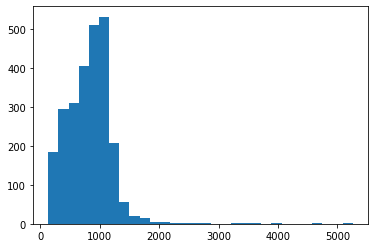

In [175]:
plt.hist(X, bins=30)
plt.show()

<p dir=rtl> حال به پیاده سازی متد پنجره پارزن میپردازیم. برای این کار یک کلاس تعریف کرده ایم. در تابع estimate این کلاس قرار است احتمال داده X بدست آید. در این جا توابع و فرمول های ریاضی که در درس داده شده است را پیاده سازی کرده‌ایم.<br> در ادامه این کلاس را به ازای طول پنجره ۱۰و۲۰و۵۰ اجرا کرده و نتیجه را نمایش داده ‌ایم.</p>

In [177]:
class PARZEN:
  def __init__(self,h):
    self.h = h

  def phi(self):
    return (np.exp(-( self.u * self.u) / 2)) / np.sqrt( 2 * (np.pi))

  def estimate(self,X):
    p = []
    for xi in range((X.shape)[0]):
      self.u = (X - xi)/self.h
      self.k = sum(self.phi())
      p.append((1/(len(X)*self.h)) * self.k)
    return p

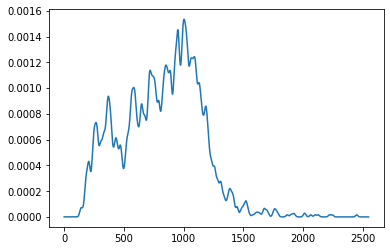

In [178]:
X = np.array(X)
parzen = PARZEN(10)
p = parzen.estimate(X)
plt.plot(range((X.shape)[0]), p)
plt.show()

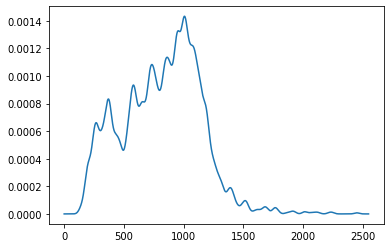

In [149]:
X = np.array(X)
parzen = PARZEN(20)
p = [parzen.estimate(X,xi) for xi in range((X.shape)[0])]
plt.plot(range((X.shape)[0]), p)
plt.show()

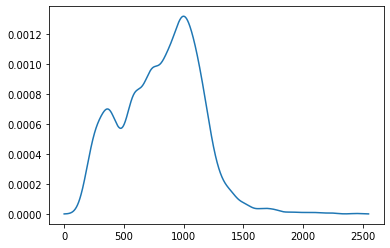

In [151]:
X = np.array(X)
parzen = PARZEN(50)
p = [parzen.estimate(X,xi) for xi in range((X.shape)[0])]
plt.plot(range((X.shape)[0]), p)
plt.show()

<p dir=rtl> در این قسمت با تابع displot از کتابخانه seaborn توزیع ستون duration را رسم کرده ایم. با بالا بردن تعداد bin ها میتوانیم همگرایی توزیع اصلی را روی نمودار شاهد باشیم.</p>

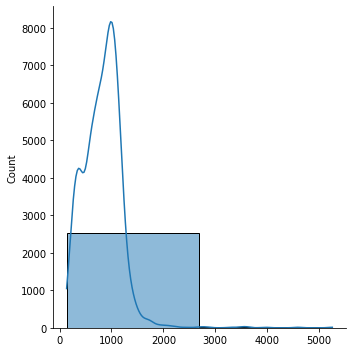

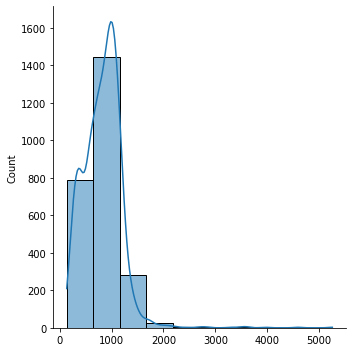

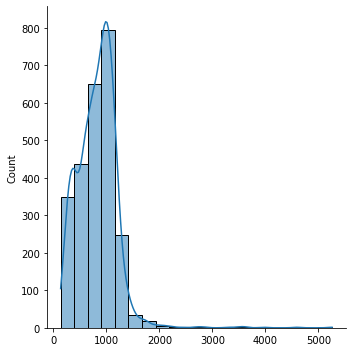

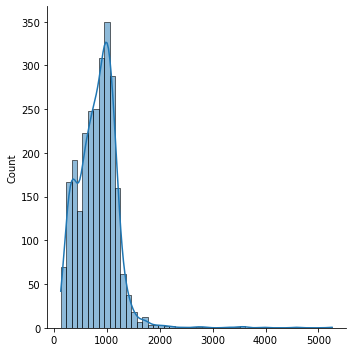

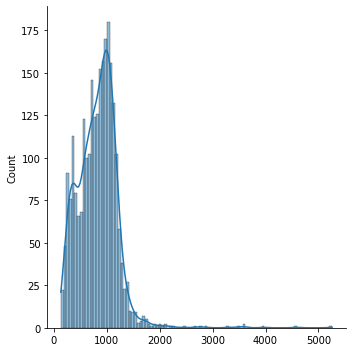

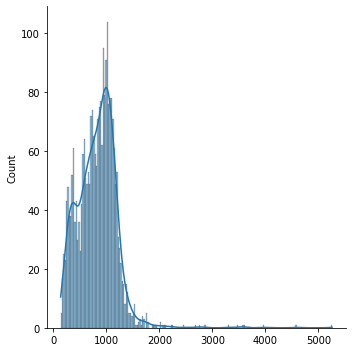

In [180]:
import seaborn as sns

for bin in [2, 10, 20, 50, 100, 200]:
  sns.displot(X, kde=True, bins=bin)

<p dir=rtl> در این قسمت توسط تابع kernelDensity با kernel گوسی، توزیع داده را بدست آورده و رسم کرده‌ایم. نتیجه بدست آمده با نتیجه ما یکسان استو</p>

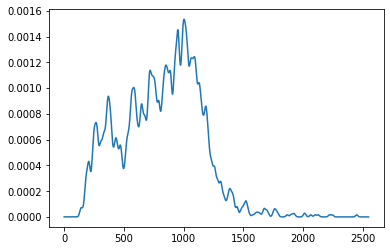

In [172]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=10)
kde.fit(X.reshape(-1,1))
centers = [xi for xi in range((X.shape)[0])]
p = kde.score_samples(np.array(centers).reshape(-1, 1))
plt.plot(range((X.shape)[0]), np.exp(p))

plt.show()